In [1]:
import numpy as np
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
my_path = '/home/lorenzp/adversialml/src/src'

# fgsms     = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_adv_fgsm')
# bims      = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_adv_bim')
# pgds      = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_adv_pgd')
# aa        = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/std/8_255/images_adv')
# deepfools = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_adv_df')
# cws       = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_adv_cw')

originals = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/bim/images')

fgsms     = torch.load(my_path +  '/data/attacks/run_5/cif10/wrn_28_10_10/fgsm/images_adv')
bims      = torch.load(my_path +  '/data/attacks/run_5/cif10/wrn_28_10_10/bim/images_adv')
pgds      = torch.load(my_path +  '/data/attacks/run_5/cif10/wrn_28_10_10/pgd/images_adv')
aa        = torch.load(my_path +  '/data/attacks/run_5/cif10/wrn_28_10_10/std/8_255/images_adv')
deepfools = torch.load(my_path +  '/data/attacks/run_5/cif10/wrn_28_10_10/df/images_adv')
cws       = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_adv_cw')
# cws  = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/cw/images_adv')

# originals    = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_bim')
o_fgsms      = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/fgsm/images')
o_bims       = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/bim/images')
o_pgds       = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/pgd/images')
o_aa         = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/std/8_255/images')
o_deepfools  = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/df/images')
o_cws        = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_cw')

# o_fgsms      = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_fgsm')
# o_bims       = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_bim')
# o_pgds       = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_pgd')
# o_cws        = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_cw')
# o_deepfools  = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_df')
# o_pgds      = torch.load(my_path + '/data/attacks/run_6/cif10/wrn_28_10_10/pgd/images')

# o_cws       = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/cw/images')
# o_deepfools = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/df/images')

attacks = [originals, originals,    fgsms,    bims,   pgds,   aa,   deepfools,  cws]
origs   = [originals, originals,   o_fgsms, o_bims, o_pgds, o_aa, o_deepfools, o_cws]
attack_name = ['normal', 'Gaussian', 'FGSM', 'BIM', ' PGD', 'AA',  'Deepfool', 'C&W']

In [3]:
my_path = '/home/lorenzp/adversialml/src/src'

originals = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/bim/images')

fgsms     = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_adv_fgsm')
bims      = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_adv_bim')
pgds      = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_adv_pgd')
aa        = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/std/8_255/images_adv')
deepfools = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_adv_df')
cws       = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_adv_cw')

o_fgsms      = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_fgsm')
o_bims       = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_bim')
o_pgds       = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_pgd')
o_aa         = torch.load(my_path + '/data/attacks/run_5/cif10/wrn_28_10_10/std/8_255/images')
o_cws        = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_cw')
o_deepfools  = torch.load('/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/cif10_adversarial_images/cif10_images_df')



attacks = [originals,   originals,  fgsms,     bims,   pgds,   aa,   deepfools,   cws]
origs   = [originals,   originals,  o_fgsms,  o_bims, o_pgds, o_aa, o_deepfools, o_cws]
attack_name = ['normal', 'Gaussian', 'FGSM', 'BIM', ' PGD', 'AA',  'Deepfool', 'C&W']


In [4]:
fgsms[0].cpu().numpy()

array([[[0.5896079 , 0.59352946, 0.6770588 , ..., 0.50725496,
         0.46411765, 0.48490196],
        [0.5660785 , 0.5621569 , 0.6535294 , ..., 0.56333333,
         0.5201961 , 0.49666667],
        [0.62215686, 0.5621569 , 0.5896079 , ..., 0.5150981 ,
         0.47980395, 0.50058824],
        ...,
        [0.23666668, 0.19470589, 0.15156862, ..., 0.17901962,
         0.08098039, 0.18686275],
        [0.20921569, 0.16215687, 0.16725491, ..., 0.13196078,
         0.14372548, 0.04843137],
        [0.24176471, 0.18960784, 0.2064706 , ..., 0.12411765,
         0.10333334, 0.11235294]],

       [[0.4092157 , 0.46529412, 0.48490196, ..., 0.40254903,
         0.38686275, 0.36333334],
        [0.4692157 , 0.46137255, 0.47705883, ..., 0.40254903,
         0.38686275, 0.37509805],
        [0.46137255, 0.457451  , 0.40529412, ..., 0.35431373,
         0.40254903, 0.37901962],
        ...,
        [0.4562745 , 0.42215687, 0.37509805, ..., 0.41039217,
         0.2809804 , 0.30333334],
        [0.4

In [11]:
def calc_magnitude_spectrum(ad_fft, scale_factor=4, unit=1):
    # mag = np.abs(ad_fft)
#     return 20*np.log2(  ad_fft ) 
    return (np.log10( ( (ad_fft)*(np.power(10,scale_factor+unit)-unit)/np.power(10,scale_factor)+unit/np.power(10,scale_factor)) )+scale_factor )*unit/(scale_factor+unit)

def plot_spectrum(fft_im, vmin, scale_factor):
    fshift0 = np.fft.fftshift(fft_im) #shifts the zero-frequency component to the center of the spectrum
    # (log10(|(fft*(10^6)-1) / ((10^5)+1 ) / (10^5)|) + 5 ) )* 1 / (scale_factor+1)
    magnitude_spectrum = calc_magnitude_spectrum(fshift0, scale_factor=5, unit=1) # (np.log10(np.abs(fshift0*(np.power(10,scale_factor+1)-1)/np.power(10,scale_factor)+1/np.power(10,scale_factor)))+scale_factor)*1/(scale_factor+1)
    plt.imshow(np.abs(magnitude_spectrum),  vmin=vmin)
    
def plot_spectrum_diff(fft1, fft2, scale_factor):
    norm = fft1-fft2
    diff = np.abs(norm)
    
    magnitude_spectrum = calc_magnitude_spectrum(diff, scale_factor=5, unit=1)
#     magnitude_spectrum = (np.log10(np.abs(diff*(np.power(10,scale_factor+1)-1)/np.power(10,scale_factor)+1/np.power(10,scale_factor)))+scale_factor)*1/(scale_factor+1)
    #plt.imshow(np.transpose(np.abs(magnitude_spectrum), (1, 2, 0)))
    plt.imshow(np.abs(magnitude_spectrum), cmap='Blues')
    return norm
                          
def plot_im(im):
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
                          
def plot_diff(im1, im2, scale_factor=0):
    im1 = im1.numpy()
    im2 = im2.numpy()
    diff = np.abs(im1-im2)
    #print(np.linalg.norm(diff))
    magnitude_spectrum =  calc_magnitude_spectrum(diff, scale_factor=5, unit=1)
#     magnitude_spectrum = (np.log10(np.abs(diff*(np.power(10,scale_factor+1)-1)/np.power(10,scale_factor)+1/np.power(10,scale_factor)))+scale_factor)*1/(scale_factor+1)
    plt.imshow(np.transpose(magnitude_spectrum, (1, 2, 0)))  
    return np.linalg.norm(diff)



def max_projection_fft(x):
    x_image = np.fft.fft2(x)
    # calculate the max for each pixel over the channels
    max_image = x_image[0,:,:].copy()
    # x_image = np.abs(x_image) #only look at the magnitude
    n = len(max_image)
    for i in range(n):
        for j in range(n):
            max_image[i,j] = max(np.abs(x_image[:,i,j]))
    return max_image



def mean_projection_fft(x):
    x_image = np.fft.fft2(x)
    # calculate the mean for each pixel over the channels
    mean_image = x_image[0,:,:].copy()
    # x_image = np.abs(x_image) #only look at the magnitude
    row, col = mean_image.shape
    for i in range(row):
        for j in range(col):
            mean_image[i,j] = np.mean( np.abs(x_image[:,i,j]) )
    return mean_image


def max_proj(image):
    (_,n,m) = np.shape(image)
    new_image = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            new_image[i,j] = np.max(image[:,i,j])
    return new_image


def mean_proj(image):
    (_,n,m) = np.shape(image)
    new_image = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            new_image[i,j] = np.mean(image[:,i,j])
    return new_image



# PMI
def calc_MI(x, y):
    c_xy = np.histogram2d(x, y)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

def patch(image, start_x, start_y, size):
    patch_im = image[:,start_x:start_x+size,start_y:start_y+size].numpy()
    return patch_im

def calculate_pmi_image(image, noise, patch_size):
    pmi_image = np.zeros((24,24))
    for i in range(24):
        for j in range(24):
            pmi_image[i,j] = calc_MI(patch(image, i,j,patch_size).flatten(), patch(noise, i,j,patch_size).flatten())
    return pmi_imag

In [12]:
n=9
MAX_PROJ = False

def calc_mins(attacks, n=9, max_proj=True):
    mins = []
    dmins = []
    dmaxs = []
    for i in range(7):
        attack = attacks[i]

        im = attack[n].cpu()
        
        if max_proj:
            ad_fft = max_projection_fft(im)
        else:
            ad_fft = mean_projection_fft(im)
#         ad_fft *= 1/np.max(ad_fft)
        
        ad_fft = np.fft.fftshift(np.abs(ad_fft))
        m_a = calc_magnitude_spectrum(ad_fft, scale_factor=5, unit=1)
        if i == 0:
            m_n = m_a

        mins.append(np.min(m_a))
        dmins.append(np.min(np.abs(m_a-m_n)))
        dmaxs.append(np.max(np.abs(m_a-m_n)))


    dmax = max(dmaxs)
    dmin = min(dmins)
    vmin = min(mins)
    
    return dmax, dmin, vmin

dmax, dmin, vmin = calc_mins(attacks, n=9, max_proj=MAX_PROJ)

In [13]:
# fig.savefig('attack_compare_avg_' + str(nr_accumulated) + '.pdf', bbox_inches='tight', dpi=300)

In [14]:
# fig.savefig('attack_compare_random_noise_' + str(nr_accumulated) + '.pdf', bbox_inches='tight', dpi=300)

In [15]:
# fig.savefig('attack_compare_old_data_max' + str(nr_accumulated) + '.pdf', bbox_inches='tight', dpi=300)

In [16]:
# fig.savefig('attacks_' + str(nr_accumulated) + '.png', bbox_inches='tight', dpi=300)

In [17]:
def noisy(image,noise_typ):
    """ 
    https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv
    image : ndarray
        Input image data. Will be converted to float.
    mode : str
        One of the following strings, selecting the type of noise to add:

        'gauss'     Gaussian-distributed additive noise.
        'poisson'   Poisson-distributed noise generated from the data.
        's&p'       Replaces random pixels with 0 or 1.
        'speckle'   Multiplicative noise using out = image + n*image,where
                 n is uniform noise with specified mean & variance.
    """
    
    image = image.astype('float32')
    
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 4./255. 
        sigma =  var #**0.5
        # noisy = gaussian_filter(image, sigma)
        gauss = np.random.normal(mean,sigma, size=(row,col,ch)).astype('float32')
        noisy = np.clip(image + gauss, 0, 1)
        
        
        # print("image", image, image.dtype)
        # print("gauss", gauss, gauss.dtype)
        return noisy #p.transpose( noisy, (1,2,0) )
    
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out.reshape(ch,row,col)
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy.reshape(ch,row,col)
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy #.reshape(ch,row,col)

In [18]:
def accumulated_ort(att_im, originals, row, n=9, max_im=10, noise_typ=''):
    if row == 0:
        return np.zeros((32,32))
    
    if n > max_im:
        print("Err: n > max_im")
    
    ad_ffts = []
    spec_diffs = []
    sel_att = att_im[:max_im]
    sel_ori = originals[:max_im]
    tmp = np.zeros((3,32,32))
    
    for idx, im in enumerate(sel_att):

        if not noise_typ == '':
            im_cpu = np.transpose( noisy( np.transpose(im.cpu().numpy(), (1, 2, 0)), noise_typ ), (2, 0, 1))
        else:
            im_cpu = im.cpu().numpy()
        
        diff = np.abs( im_cpu - sel_ori[idx].cpu().numpy() )
        tmp = tmp + diff
        
    return tmp  / max_im


def accumulated_mean(att_im, originals, row, n=9, max_im=10, noise_typ=''):
    
    if n > max_im:
        print("Err: n > max_im")
    
    ad_ffts = []
    spec_diffs = []
    
    sel_att = att_im[:max_im]
    sel_ori = originals[:max_im]
    tmp = np.zeros((32,32))
    
    for idx, im in enumerate(sel_att):
        # print(im.cpu().numpy().shape )
        if not noise_typ == '':
            im_cpu = np.transpose( noisy( np.transpose(im.cpu().numpy(), (1, 2, 0)), noise_typ ), (2, 0, 1))
        else:
            im_cpu = im.cpu()
        
        if MAX_PROJ:    
            ad_fft = max_projection_fft( im_cpu )
            o_fft = max_projection_fft( sel_ori[idx].cpu() )
        else:
            ad_fft = mean_projection_fft( im_cpu )    
            o_fft = mean_projection_fft( sel_ori[idx].cpu() )
        
        
        diff = np.abs(ad_fft - o_fft)
        tmp = tmp + diff

    return tmp / max_im


float32


<Figure size 432x288 with 0 Axes>

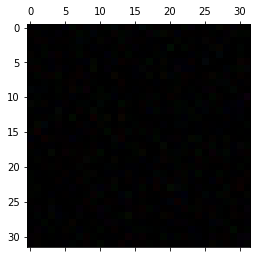

In [19]:
plt.figure()

tmp = np.zeros((32,32, 3))
noisy_tmp = noisy(tmp,'gauss')
print(noisy_tmp.dtype)

plt.matshow(noisy_tmp)

In [20]:
noisy_tmp.dtype

dtype('float32')

normal
im float32 (3, 32, 32) (32, 32, 3)
Gaussian
im float32 (3, 32, 32) (32, 32, 3)
im float32 (3, 32, 32) (32, 32, 3)
im float32 (3, 32, 32) (32, 32, 3)
row:  1 2048 2048
im float32 (3, 32, 32) (32, 32, 3)
row:  1 2048 2048
FGSM
row:  2 8054 8054
row:  2 8054 8054
BIM
row:  3 8658 8658
row:  3 8658 8658
 PGD
row:  4 8656 8656
row:  4 8656 8656
AA
row:  5 2161 2161
row:  5 2161 2161
Deepfool
row:  6 8658 8658
row:  6 8658 8658
C&W
row:  7 8658 8658
row:  7 8658 8658


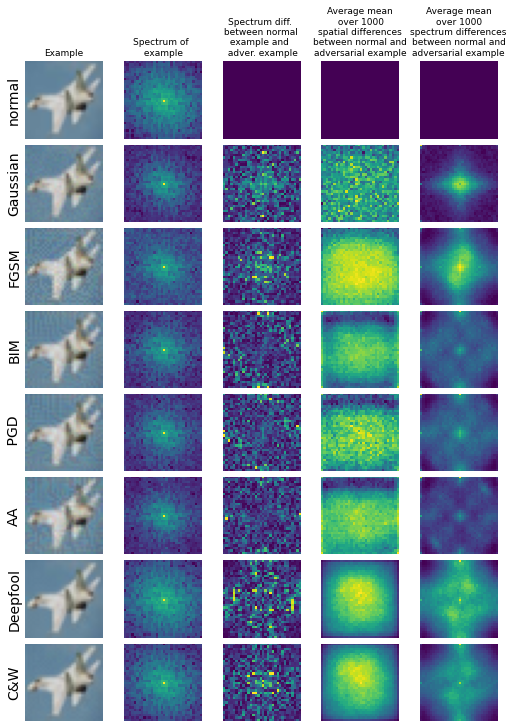

In [37]:
nr_accumulated = 1000
rows = 8
cols = 5
noise_typ = "gauss"
fontsize_col=9

fig, axes = plt.subplots(rows, cols, figsize=(7,10), constrained_layout=True,)
# fig, axes = plt.subplots(7,3, figsize=(7,14), gridspec_kw={'wspace':0.1, 'hspace':0.1, 'top':0.9,'bottom':0.11})

for row in range(rows):
    for col in range(cols):    
        ax = axes[row, col]

        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)
        
        attack = attacks[row]
        im = attack[n].cpu().numpy()
        
        if row == 1:
            print("im", im.dtype, im.shape, np.transpose(im, (1, 2, 0)).shape)
            im =  np.transpose(noisy(np.transpose(im, (1, 2, 0)), 'gauss'), (2, 0, 1))


        if MAX_PROJ:
            ad_fft = max_projection_fft(im)
        else:
            ad_fft = mean_projection_fft(im)
        
        m_a = calc_magnitude_spectrum(np.fft.fftshift(np.abs(ad_fft)), scale_factor=5, unit=1)
        if col == 0 and row == 0:
            orig = im
            fft = ad_fft
            m_n = m_a
        
        if col == 0:
            original = np.transpose(im, (1, 2, 0))
            ax.imshow( original )
            ax.set_ylabel(attack_name[row], fontdict={'fontsize': 14, 'fontweight': 'medium'})
            print(attack_name[row])
            
            if row == 0:
                ax.set_title('Example', fontsize=fontsize_col)

        if col == 1:
            fshift0 = np.fft.fftshift( ad_fft ) #shifts the zero-frequency component to the center of the spectrum
            # (log10(|(fft*(10^6)-1) / ((10^5)+1 ) / (10^5)|) + 5 ) * (scale_factor+1)
            magnitude_spectrum = calc_magnitude_spectrum(fshift0, scale_factor=5, unit=1)

            ax.matshow( np.abs(magnitude_spectrum),  )
            ax.set_xticks([])
            ax.set_yticks([])
            if row == 0:
                ax.set_title('Spectrum of \n example', fontsize=fontsize_col)

        if col == 2:
            spec_dif = np.abs(ad_fft - fft)
            if row == 0:
                im_spec = ax.imshow(np.zeros((32,32)), vmin=0,)
            else:
                im_spec = ax.matshow(spec_dif, )
                ax.set_xticks([])
                ax.set_yticks([])

            if row== 0:
                ax.set_title('Spectrum diff. \n between normal \n example and  \n adver. example', fontsize=fontsize_col)
                # ax.set_title('|fft(Exa)-fft(Adv)|', fontsize=fontsize_col)
    
    
        if col == 3:
            if row == 0:
                # ax.set_title('$|Exa_i-Adv_i|_i / n$'.format(nr_accumulated), fontsize=fontsize_col)
                ax.set_title('Average mean\n over {}\nspatial differences\nbetween normal and\nadversarial example'.format(nr_accumulated), fontsize=fontsize_col)
                ori = origs[row]
                acc_im = accumulated_ort(attack, ori, row, n=9, max_im=nr_accumulated)
                
                im_acc = ax.matshow(acc_im, )
            else:
                print("row: ", row, len(origs[row]), len(attack))
                ori = origs[row]
                
                if row == 1:
                    acc_spatial = accumulated_ort(ori,    ori, row, n=9, max_im=nr_accumulated, noise_typ=noise_typ )
                else:
                    acc_spatial = accumulated_ort(attack, ori, row, n=9, max_im=nr_accumulated)

                im_acc = ax.matshow( acc_spatial.sum(axis=0) )
            ax.set_xticks([])
            ax.set_yticks([])
    
        if col == 4:
            if row == 0:
                # ax.set_title('Accum Spec {}'.format(nr_accumulated))
                ax.set_title('Average mean\nover {}\nspectrum differences\nbetween normal and\nadversarial example'.format(nr_accumulated), fontsize=fontsize_col)
                # ax.set_title('$|fft(Exa_i)-fft(Adv_i)|_i / n$'.format(nr_accumulated), fontsize=fontsize_col)
                im_acc = ax.matshow(np.zeros((32,32)), )
            else:
                print("row: ", row, len(origs[row]), len(attack))
                ori = origs[row]
                if MAX_PROJ:
                    acc_im = accumulated(attack, ori, row, n=9, max_im=nr_accumulated)
                else:
                    if row == 1:
                        acc_im = accumulated_mean(ori   , ori, row, n=9, max_im=nr_accumulated, noise_typ=noise_typ )
                    else:
                        acc_im = accumulated_mean(attack, ori, row, n=9, max_im=nr_accumulated)

                im_acc = ax.matshow(acc_im,  )
            ax.set_xticks([])
            ax.set_yticks([])
    

# fig.savefig('attack_compare', bbox_inches='tight', dpi=300)
# fig.savefig('attack_compare_avg_' + str(nr_accumulated) + '.pdf', bbox_inches='tight', dpi=300)
# fig.savefig('attack_compare_acc_' + str(nr_accumulated) + '.pdf', bbox_inches='tight', dpi=300)

# fig.savefig('attack_compare.svg', bbox_inches='tight', dpi=300)

In [260]:
# fig.savefig('attacks_' + str(nr_accumulated) + '_tmp.pdf', bbox_inches='tight', dpi=300)
# fig.savefig('attacks_' + str(nr_accumulated) + '_noise.pdf', bbox_inches='tight', dpi=300)

In [247]:
np.max(acc_spatial)

0.004043734986335039

In [38]:
# fig.savefig('attacks_' + str(nr_accumulated) + '.png', bbox_inches='tight', dpi=300)
fig.savefig('attacks_' + str(nr_accumulated) + '_noise.png', bbox_inches='tight', dpi=300)

In [249]:
acc_spatial.sum(axis=0).shape

(32, 32)

In [28]:
nr_accumulated

1000